# Blatt 8, Aufgabe 2
## Gruppe AC
__Aufgabenteil 1:__

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def error(w):
    E = -2*(w+5)**2 + (w-6)**3
    return E

def error_grad(w):
    dE = -4*(w+5) + 3*(w-6)**2
    return dE

def adaptive(eta, beta, iterations):
    #w    = np.zeros((1,11)) 
    #w[0] = 4
    w = []
    w.append(4)
    s = []
    s.append(3)
    E = []
    
    eps = 10**-8
    
    for i in range(10):
        dE = error_grad(w[-1])
        s.append(beta*s[-1] + (1-beta)*dE**2)
        w.append(w[-1] - eta*dE/np.sqrt(s[-1]+eps))
        E.append(error(w[-1]))
    return E,w

(-400, -100)

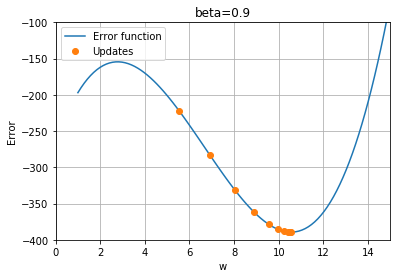

In [5]:
eta = 0.5
beta = 0.9
E, w = adaptive(eta,beta,10)

plt.figure(1)  

t = np.linspace(1, 15, num = 100)
error_fun = np.zeros(100)
for i in range(100):
    error_fun[i] = error(t[i])
plt.plot(t, error_fun, label = 'Error function')

plt.plot(w[1:], E, 'o', label = 'Updates') 

plt.legend()
plt.xlabel('w')
plt.ylabel('Error')
plt.title('beta=0.9');
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-400,-100])

__Aufgabenteil 2:__ <br>
![title](table1.png) <br>



b) Die Fälle, in denen die Probleme verstärkt werden, treten weniger häufig auf, da dann in den vorherigen Schritten der Gradient sich gegenteilig verhalten müsste.

__Aufgabenteil 3:__ <br>
a) $w(t) = w(t-1) - \eta * sgn(\nabla E(w(t-1)))$ <br>

(-400, -100)

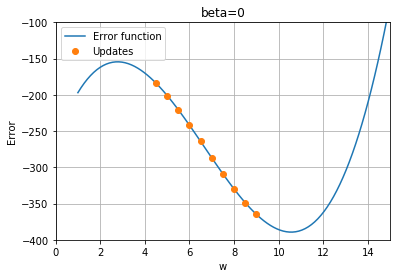

In [9]:
beta = 0
E2, w2 = adaptive(eta,beta,10)

plt.figure(1)  
plt.plot(t, error_fun, label = 'Error function')
plt.plot(w2[1:], E2, 'o', label = 'Updates')

plt.legend()
plt.xlabel('w')
plt.ylabel('Error')
plt.title('beta=0');
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-400,-100])

b) Die Informationen des vorherigen Gradienten gehen verloren und es wird nur noch der aktuelle Gradient betrachtet. Das Ergebnis hängt weiterhin kaum von der betragsmäßigen Größe des Gradientens, sondern hauptsächlich von dessen Vorzeichen ab. Der Fehler verhält sich nun linear zum Anstieg von w. Dies passt zur linearen Gleichung, die aus (2) mit beta=0 resultiert.<br>

c) Die 8 möglichen Richtungen, in die sich die Updates bewegen können sind:  
$\begin{pmatrix}1\\1\end{pmatrix}$, $\begin{pmatrix}-1\\-1\end{pmatrix}$, $\begin{pmatrix}1\\-1\end{pmatrix}$, $\begin{pmatrix}-1\\1\end{pmatrix}$, $\begin{pmatrix}0\\1\end{pmatrix}$, $\begin{pmatrix}0\\-1\end{pmatrix}$, $\begin{pmatrix}1\\0\end{pmatrix}$, $\begin{pmatrix}-1\\0\end{pmatrix}$

d) Ein ähnliches Optimierungsverfahren aus der Vorlesung ist SuperSAB (Super Self Adapting Backprop)

__Aufgabenteil 4:__ <br>
a) 
\begin{align*}
s(2) &= \nabla E(1)^2 = g_2^2 = 4 \\
C_a(-2,2) &= \left\vert \frac{2}{\sqrt{s(2)}} \right\vert- |g_2| \\
          &= \left\vert \frac{2}{\sqrt{4}} \right\vert - 2 = -1
\end{align*} <br>
b) 
Die roten Regionen zeigen, wo der Gradient $g_2$ vergrößert wird ($C_a>0$). In den blauen Regionen wird der Gradient $g_2$ verkleinert ($C_a<0$). 
Ist $\beta=0$, ist der Zusammenhang zwischen $\left\vert g_2/\sqrt{s(2)} \right\vert$ und $g_2$ nahezu linear, sodass der Betrag des Gradienten beinahe unberücksichtigt bleibt. Mit steigendem Beta wird $C_a$ immer größer für kleine Gradienten.
<br>
Sind die Gradienten beide sehr klein, ist $C_a$ entsprechend groß, sodass Plateaus des Fehlers schnell verlassen werden können und das Problem mit kleinen Gradienten überwunden wird. Ist mindestens einer beiden Gradienten groß, wird $C_a$ klein, sodass eine zu große Schrittweite vermieden werden kann. 


__Aufgabenteil 5:__<br>
a) Mit zunehmender Größe von beta werden vorherige Skalierungen s miteinbezogen, wodurch die Kurve breiter wird. Im Kontrast dazu ist für beta=0 der Verlauf unabängig von vorherigen Skalierungen s und ausschließlich abhängig vom Gradienten des vorherigen Schrittes. <br>

b) Die s2-Kurve läuft größtenteils über der s1-Kurve, weil deren Gradient größer ist und dieser daher einer höheren Skalierung bedarf..<br>

c) Mit adaptiven Schrittweiten für jedes Gewicht, ist es möglich, die Schrittweiten für jedes Gewicht an den jeweiligen Gradienten anzupassen, wodurch man schneller zum Minimum finden kann. <br>

d) neue initiale Position: (8.75,2.86)